# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df_npk = pd.read_csv('../Data_collection/Hair_cosmetics_by_PEH_napieknewlosy.csv')
df_l = pd.read_csv('../Data_collection/Hair_cosmetics_by_PEH_loczek.csv')

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
df_npk

Unnamed: 0                                               inci  \
0             0   Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
1             1   Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
2             2   Aqua [Water], Cetyl alcohol, Behenamidopropyl...   
3             3   Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
4             4   Aqua [Water] (Eau), Stearyl alcohol, Behenami...   
5             5   Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
6             6   Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
7             7   Aqua [Water], Cetyl alcohol, Behenamidopropyl...   
8             8   Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
9             9   Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
10           10   Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
11           11   Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
12           12   Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
13           13   Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
14           14   Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
15           15   Aqua, Orbignya Oleifera Seed Oil, Cetearyl Al...   
16           16   Aqua, Cetearyl Alcohol, Butyrospermum Parkii ...   
17           17   Aqua, Cetearyl Alcohol, Butyrospermum Parkii ...   
18           18   Aqua, Macadamia Ternifolia Seed Oil (olej mac...   
19           19   Aqua, Macadamia Ternifolia Seed Oil (olej mac...   
20           20   Aqua/Water/Eau, Cocos Nucifera (Coconut) Oil,...   
21           21   Aqua/Water/Eau, Cetearyl Alcohol, Cetyl Alcoh...   
22           22   Aqua/Water/Eau, Glycine Soja (Soybean) Oil, P...   
23           23   Aqua, Cetearyl Alcohol, Behentrimonium Chlori...   
24           24   Aqua, Cetearyl Alcohol, Behentrimonium Chlori...   
25           25   BEHENTRIMONIUM METHOSULFATE, CETYL ALCOHOL, T...   
26           26   Nałożyć odżywkę na umyte, wilgotne włosy. Zmy...   
27           27                                                NaN   
28           28   Water, Cetearyl Alcohol, Simmondsia Chinensis...   
29           29   Aqua, Jasminum Officinale (woda jaśminowa) Fl...   
30           30   Aqua, Persea Gratissima (Avocado) Oil (olej a...   
31           31   Aqua, Butyrospermum parkii (Shea butter) oil ...   
32           32   Aqua, Butyrospermum parkii (Shea butter) oil ...   
33           33   Aqua, Kaolin (White Clay), Cetearyl Alcohol, ...   
34           34   Aqua, Butyrospermum Parkii (Shea) Butter, Orc...   
35           35   Aqua, Vaccinium Angustifolium Fruit Extract, ...   
36           36   Distilled Water, Cocos Nucifera (Coconut) Wat...   
37           37   Distilled water, cocos nucifera (coconut) wat...   
38           38   Deionized Water, Behentrimonium Methosulfate ...   
39           39   Distilled Water, Opuntia ficus indica (morocc...   
40           40   Water, Stearyl Alcohol, Cetyl Alcohol, Persea...   
41           41   Water (Aqua, Eau), Cetearyl Alcohol, Linum Us...   
42           42   Water (Aqua, Eau), Stearyl Alcohol, Cetyl Alc...   
43           43   Water (Aqua), Cetearyl Alcohol, Canola Oil, B...   
44           44   Aqua/Eau (Water), Zea Mays (Corn) Oil, Glycin...   
45           45   Water (Aqua), Glycerin, Butyrospermum Parkii ...   
46           46   Water (Aqua), Cetearyl Alcohol (Plant Derived...   
47           47   Water (Aqua), Glycerin (Plant Derived), Polyq...   
48           48   Aqua, Acorus Calamus extract (ekstrakt z tata...   
49           49   Aqua, Organic Panax extract (organiczny ekstr...   
50           50   Aqua, Centaurea Сyanus Floral Water (woda cha...   
51           51   Nałożyć balsam na umyte, wilgotne włosy. Zmyć...   
52           52   Aqua, Vaccinium Macrocarpon Floral Water (wod...   
53           53   Aqua, Hibiscus Petal Floral Water (woda hibis...   
54           54   Aqua, Carica Papaya Floral Water (wywar z pap...   
55           55   Aqua, Salvia Officinalic extract (ekstrakt z ...   
56           56

In [5]:
df_l

Unnamed: 0                                               inci  \
0             0  Water (Aqua/Eau),Carbomer,Polysorbate-20,VP/VA...   
1             1  Water (Aqua),Eau),Glycerin,Fragrance (Parfum),...   
2             2  Water (Aqua/Eau),Polyquaternium-37,Cyclopentas...   
3             3  Aqua (Water),Cetearyl Alcohol,Cetrimonium Chlo...   
4             4  Aqua,Cetearyl Alcohol,Myristyl Alcohol,Cetrimo...   
5             5             Helianthus Annuus (Sunflower) Seed Oil   
6             6                 Argania Spinosa (Argan) Kernel Oil   
7             7               Orbignya Oleifera (Babassu) Seed Oil   
8             8  Aqua,Macadamia Ternifolia Seed Oil,Cetearyl Al...   
9             9                  Melia Azadirachta (Neem) Seed Oil   
10           10                       Cocos Nucifera (Coconut) Oil   
11           11                    Cannabis Sativa (Hemp) Seed Oil   
12           12  Aqua,Cetyl Alcohol,Stearyl Alcohol,Cetrimonium...   
13           13               Adansonia Digitata (Baobab) Seed Oil   
14           14  Aqua,Macadamia Ternifolia Seed Oil,Cetearyl Al...   
15           15  Aqua,Orbignya Oleifera (Babassu) Seed Oil,Cete...   
16           16  Water (Aqua/Eau),Pvp,Isobutane,Propane,Phenoxy...   
17           17  Aqua,Cetearyl Alcohol,Persea Gratissima (Avoca...   
18           18                           Punica Granatum Seed Oil   
19           19  Cocos Nucifera (Coconut) Oil,Terminalia Chebul...   
20           20  Aqua/Water/Eau,Butane,VP/VA copolymer,Isobutan...   
21           21  Water (Aqua/Eau),Carbomer,Polysorbate-20,VP/VA...   
22           22  Aqua,PEG-25 Hydrogenated Castor Oil,PEG-7 Glyc...   
23           23  Aqua (Water),Cetyl Alcohol,Persea Gratissima (...   
24           24                      Butyrospermum Parkii Seed Oil   
25           25         Prunus Amygdalus Dulcis (Sweet Almond) Oil   
26           26  Aqua,Cetearyl Alcohol,Cetrimonium Chloride,Lin...   
27           27  Aqua,Cetearyl Alcohol,Cetrimonium Chloride,Ami...   
28           28                 Butyrospermum Parkii (Shea) Butter   
29           29  Water (Aqua),Polyquaternium-72,Shea Butter Eth...   
30           30                   Euterpe Oleracea (Acai) Seed Oil   
31           31  Aqua,Cetearyl Alcohol,Cetrimonium Chloride,Per...   
32           32  Aqua,Cetearyl Alcohol,Myristyl Alcohol,Cetrimo...   
33           33  Aqua,Cetearyl Alcohol,Cetrimonium Chloride,Ami...   
34           34  Water (Aqua/Eau),Cetyl Alcohol,Cetrimonium Chl...   
35           35                      Macadamia Ternifolia Seed Oil   
36           36  Aqua,Cetearyl Alcohol,Cetrimonium Chloride,Cit...   
37           37           Calophyllum Inophyllum (Tamanu) Seed Oil   
38           38               Sclerocarya Birrea (Marula) Seed Oil   
39           39                           Punica Granatum Seed Oil   
40           40  Octyldodecanol,Argania Spinosa Kernel Oil,Acor...   
41           41  Water (Aqua/Eau),Cetearyl Alcohol,Simmondsia C...   
42           42  Linum Usitatissimum (Linseed) Seed Oil,Ricinus...   
43           43               Adansonia Digitata (Baobab) Seed Oil   
44           44  Helianthus Annuus (Sunflower) Seed Oil,Argania...   
45           45           Citrullus Vulgaris (Watermelon) Seed Oil   
46           46                        Borago Officinalis Seed Oil   
47           47         Prunus Amygdalus Dulcis (Sweet Almond) Oil   
48           48                  Cucurbita Pepo (Pumpkin) Seed Oil   
49           49                 Ricinus Communis (Castor) Seed Oil   
50           50                Prunus Armeniaca (Apricot) Seed Oil   
51           51                          Moringa Oleifera Seed Oil   
52           52  Argania Spinosa Kernel Oil,Macadamia Ternifoli...   
53           53  Glycerin,Water (Aqua/Eau),Butylene Glycol,PEG-...   
54           54                           Laurus Nobilis Fruit Oil   
55           55                            Coffea Arabica Seed Oil   
56           56

In [6]:
df_peh = pd.concat([df_npk, df_l], ignore_index=True)

In [7]:
df_peh.shape

(583, 4)

In [8]:
df_peh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  583 non-null    int64 
 1   inci        578 non-null    object
 2   title       583 non-null    object
 3   peh_class   583 non-null    object
dtypes: int64(1), object(3)
memory usage: 18.3+ KB


In [9]:
df_peh.dtypes

Unnamed: 0     int64
inci          object
title         object
peh_class     object
dtype: object

In [10]:
df_peh.columns

Index(['Unnamed: 0', 'inci', 'title', 'peh_class'], dtype='object')

In [11]:
df_peh.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df_peh['inci']

0       Aqua [Water],Cetyl alcohol,Behenamidopropyl d...
1       Aqua [Water],Cetyl alcohol,Behenamidopropyl d...
2       Aqua [Water], Cetyl alcohol, Behenamidopropyl...
3       Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...
4       Aqua [Water] (Eau), Stearyl alcohol, Behenami...
5       Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...
6       Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...
7       Aqua [Water], Cetyl alcohol, Behenamidopropyl...
8       Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...
9       Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...
10      Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...
11      Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...
12      Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...
13      Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...
14      Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...
15      Aqua, Orbignya Oleifera Seed Oil, Cetearyl Al...
16      Aqua, Cetearyl Alcohol, Butyrospermum Parkii ...
17      Aqua, Cetearyl Alcohol,

# Find nan values

In [13]:
rows_with_nan = [index for index, row in df_peh.iterrows() if row.isnull().any()]
rows_with_nan

[27, 123, 124, 145, 146]

In [14]:
for i in rows_with_nan:
    print(df_peh['title'][i])   

BIOLAVEN x NAPIEKNEWLOSY.PL Zestaw szampon + odżywka z olejem z pestek winogron 2x300ml
ANWEN Wegański zestaw odżywek do włosów o średniej porowatości 3x100ml
ANWEN Zestaw odżywek do włosów o średniej porowatości 3x100ml
CAFE MIMI Maska z keratyną – do włosów farbowanych i zniszczonych 110ml
CAFE MIMI Maska z proteinami – do włosów cienkich i łamliwych 110ml


# Fill or drop nan values

In [15]:
df_peh['inci'][145] = 'Aqua, Plumeria Alba (Frangipani) Flower Water, Cetearyl Alcohol, Vegetable Glyсerin, Ginkgo Biloba Leaf Extract, Zingiber Officinale (Ginger) Root Extract, Butyrospermum Parkii (Shea) Oil, Caprylic/Capric Triglyceride, Hydrolyzed Keratin, Persea Gratissima (Avocado) Oil, Behentrimonium Chloride, Hydroxypropyl Guar, Hydroxypropyltrimonium chloride, Hydroxyethylcellulose, Panthenol, Perfume, Silicone Quaternium-18, Trideceth-6, Trideceth-12, Polyquaternium-10, Benzyl Alcohol, Benzoic Acid , Dehydroacetic Acid, Potassium Sorbate, Sodium Benzoate, Citric Acid,  Butylphenyl Methypropional, Linalool, Limonene, Citronellol, Coumarin, Geraniol, Citral'
df_peh['inci'][145]

'Aqua, Plumeria Alba (Frangipani) Flower Water, Cetearyl Alcohol, Vegetable Glyсerin, Ginkgo Biloba Leaf Extract, Zingiber Officinale (Ginger) Root Extract, Butyrospermum Parkii (Shea) Oil, Caprylic/Capric Triglyceride, Hydrolyzed Keratin, Persea Gratissima (Avocado) Oil, Behentrimonium Chloride, Hydroxypropyl Guar, Hydroxypropyltrimonium chloride, Hydroxyethylcellulose, Panthenol, Perfume, Silicone Quaternium-18, Trideceth-6, Trideceth-12, Polyquaternium-10, Benzyl Alcohol, Benzoic Acid , Dehydroacetic Acid, Potassium Sorbate, Sodium Benzoate, Citric Acid,  Butylphenyl Methypropional, Linalool, Limonene, Citronellol, Coumarin, Geraniol, Citral'

In [16]:
df_peh['inci'][146] = 'Aqua, Malva Sylvestris (Mallow) Flower Water, Cetearyl Alcohol, Vegetable Glyсerin, Linum Usitatissimum (Flax) Seed  Extract, Bambusa Vulgaris (Bamboo) Extract, Caprylic/Capric Triglyceride, Cocos Nucifera (Coconut) Oil, Hydrolyzed Wheat Proteins , Hydrolyzed Rye, Hydrolyzed Oat Proteins, Behentrimonium Chloride,  Hydroxyethylcellulose,   Panthenol, Hydroxypropyl Guar,  Hydroxypropyltrimonium chloride, Silicone Quaternium-18, Trideceth-6, Trideceth-12, Polyquaternium-10, Perfume, Benzyl Alcohol, Benzoic Acid , Dehydroacetic Acid, Potassium Sorbate, Sodium Benzoate, Citric Acid, Hexyl Cinnamal, Benzyl Salicylate, Limonene, Linalool, Citronellol, Coumarin'
df_peh.loc[146]

inci         Aqua, Malva Sylvestris (Mallow) Flower Water, ...
title        CAFE MIMI Maska z proteinami – do włosów cienk...
peh_class                                                    P
Name: 146, dtype: object

In [17]:
df_peh.drop([27], inplace=True)
df_peh.drop([123], inplace=True)
df_peh.drop([124], inplace=True)
df_peh.reset_index(drop=True, inplace=True)
df_peh

inci  \
0     Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
1     Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
2     Aqua [Water], Cetyl alcohol, Behenamidopropyl...   
3     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
4     Aqua [Water] (Eau), Stearyl alcohol, Behenami...   
5     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
6     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
7     Aqua [Water], Cetyl alcohol, Behenamidopropyl...   
8     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
9     Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
10    Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
11    Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
12    Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
13    Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
14    Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
15    Aqua, Orbignya Oleifera Seed Oil, Cetearyl Al...   
16    Aqua, Cetearyl Alcohol, Butyrospermum Parkii ...   
17    Aqua, Cetearyl Alcohol, Butyrospermum Parkii ...   
18    Aqua, Macadamia Ternifolia Seed Oil (olej mac...   
19    Aqua, Macadamia Ternifolia Seed Oil (olej mac...   
20    Aqua/Water/Eau, Cocos Nucifera (Coconut) Oil,...   
21    Aqua/Water/Eau, Cetearyl Alcohol, Cetyl Alcoh...   
22    Aqua/Water/Eau, Glycine Soja (Soybean) Oil, P...   
23    Aqua, Cetearyl Alcohol, Behentrimonium Chlori...   
24    Aqua, Cetearyl Alcohol, Behentrimonium Chlori...   
25    BEHENTRIMONIUM METHOSULFATE, CETYL ALCOHOL, T...   
26    Nałożyć odżywkę na umyte, wilgotne włosy. Zmy...   
27    Water, Cetearyl Alcohol, Simmondsia Chinensis...   
28    Aqua, Jasminum Officinale (woda jaśminowa) Fl...   
29    Aqua, Persea Gratissima (Avocado) Oil (olej a...   
30    Aqua, Butyrospermum parkii (Shea butter) oil ...   
31    Aqua, Butyrospermum parkii (Shea butter) oil ...   
32    Aqua, Kaolin (White Clay), Cetearyl Alcohol, ...   
33    Aqua, Butyrospermum Parkii (Shea) Butter, Orc...   
34    Aqua, Vaccinium Angustifolium Fruit Extract, ...   
35    Distilled Water, Cocos Nucifera (Coconut) Wat...   
36    Distilled water, cocos nucifera (coconut) wat...   
37    Deionized Water, Behentrimonium Methosulfate ...   
38    Distilled Water, Opuntia ficus indica (morocc...   
39    Water, Stearyl Alcohol, Cetyl Alcohol, Persea...   
40    Water (Aqua, Eau), Cetearyl Alcohol, Linum Us...   
41    Water (Aqua, Eau), Stearyl Alcohol, Cetyl Alc...   
42    Water (Aqua), Cetearyl Alcohol, Canola Oil, B...   
43    Aqua/Eau (Water), Zea Mays (Corn) Oil, Glycin...   
44    Water (Aqua), Glycerin, Butyrospermum Parkii ...   
45    Water (Aqua), Cetearyl Alcohol (Plant Derived...   
46    Water (Aqua), Glycerin (Plant Derived), Polyq...   
47    Aqua, Acorus Calamus extract (ekstrakt z tata...   
48    Aqua, Organic Panax extract (organiczny ekstr...   
49    Aqua, Centaurea Сyanus Floral Water (woda cha...   
50    Nałożyć balsam na umyte, wilgotne włosy. Zmyć...   
51    Aqua, Vaccinium Macrocarpon Floral Water (wod...   
52    Aqua, Hibiscus Petal Floral Water (woda hibis...   
53    Aqua, Carica Papaya Floral Water (wywar z pap...   
54    Aqua, Salvia Officinalic extract (ekstrakt z ...   
55    Aqua, Organic Camelia Sinensis extract (organ...   
56    Aqua, Hamamelis Virginiana extract (ekstrakt ...   
57    Aqua, Organic Zingiber officinale Extract (or...   
58    Aqua, Zingiber Officinale Root Floral Water (...   
59    Aqua, Prunus Persica (Peach) Floral Water (hy...   
60    Aqua, Simmondsia Chinensis (Jojoba) Seed Oil ...   
61    Aqua with infusion of:  Aloe Barbadensis (Alo...   
62    Aqua (Water), Cetearyl Alcohol, Behenamidopro...   
63    Aqua (Water), Cetearyl Alcohol, Behenamidopro...   
64    Aqua (Water), Cetearyl Alcohol, Distearoyleth...   
65    Aqua (Water), Cetearyl Alcohol, Distearoyleth...   
66    Aqua, Salvia Officinalis Flower Water (hydrol...   
67    Aqua, Pentaphylloides Fruticosa Flower Water ...   
68    Aqua, Olea Europaea Fruit Oil, Hippophae R

In [18]:
df_peh.isnull().sum()

inci         0
title        0
peh_class    0
dtype: int64

# Data cleaning

In [19]:
df_peh_work = df_peh.copy()

In [20]:
df_peh_work

inci  \
0     Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
1     Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
2     Aqua [Water], Cetyl alcohol, Behenamidopropyl...   
3     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
4     Aqua [Water] (Eau), Stearyl alcohol, Behenami...   
5     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
6     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
7     Aqua [Water], Cetyl alcohol, Behenamidopropyl...   
8     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
9     Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
10    Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
11    Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
12    Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
13    Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
14    Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
15    Aqua, Orbignya Oleifera Seed Oil, Cetearyl Al...   
16    Aqua, Cetearyl Alcohol, Butyrospermum Parkii ...   
17    Aqua, Cetearyl Alcohol, Butyrospermum Parkii ...   
18    Aqua, Macadamia Ternifolia Seed Oil (olej mac...   
19    Aqua, Macadamia Ternifolia Seed Oil (olej mac...   
20    Aqua/Water/Eau, Cocos Nucifera (Coconut) Oil,...   
21    Aqua/Water/Eau, Cetearyl Alcohol, Cetyl Alcoh...   
22    Aqua/Water/Eau, Glycine Soja (Soybean) Oil, P...   
23    Aqua, Cetearyl Alcohol, Behentrimonium Chlori...   
24    Aqua, Cetearyl Alcohol, Behentrimonium Chlori...   
25    BEHENTRIMONIUM METHOSULFATE, CETYL ALCOHOL, T...   
26    Nałożyć odżywkę na umyte, wilgotne włosy. Zmy...   
27    Water, Cetearyl Alcohol, Simmondsia Chinensis...   
28    Aqua, Jasminum Officinale (woda jaśminowa) Fl...   
29    Aqua, Persea Gratissima (Avocado) Oil (olej a...   
30    Aqua, Butyrospermum parkii (Shea butter) oil ...   
31    Aqua, Butyrospermum parkii (Shea butter) oil ...   
32    Aqua, Kaolin (White Clay), Cetearyl Alcohol, ...   
33    Aqua, Butyrospermum Parkii (Shea) Butter, Orc...   
34    Aqua, Vaccinium Angustifolium Fruit Extract, ...   
35    Distilled Water, Cocos Nucifera (Coconut) Wat...   
36    Distilled water, cocos nucifera (coconut) wat...   
37    Deionized Water, Behentrimonium Methosulfate ...   
38    Distilled Water, Opuntia ficus indica (morocc...   
39    Water, Stearyl Alcohol, Cetyl Alcohol, Persea...   
40    Water (Aqua, Eau), Cetearyl Alcohol, Linum Us...   
41    Water (Aqua, Eau), Stearyl Alcohol, Cetyl Alc...   
42    Water (Aqua), Cetearyl Alcohol, Canola Oil, B...   
43    Aqua/Eau (Water), Zea Mays (Corn) Oil, Glycin...   
44    Water (Aqua), Glycerin, Butyrospermum Parkii ...   
45    Water (Aqua), Cetearyl Alcohol (Plant Derived...   
46    Water (Aqua), Glycerin (Plant Derived), Polyq...   
47    Aqua, Acorus Calamus extract (ekstrakt z tata...   
48    Aqua, Organic Panax extract (organiczny ekstr...   
49    Aqua, Centaurea Сyanus Floral Water (woda cha...   
50    Nałożyć balsam na umyte, wilgotne włosy. Zmyć...   
51    Aqua, Vaccinium Macrocarpon Floral Water (wod...   
52    Aqua, Hibiscus Petal Floral Water (woda hibis...   
53    Aqua, Carica Papaya Floral Water (wywar z pap...   
54    Aqua, Salvia Officinalic extract (ekstrakt z ...   
55    Aqua, Organic Camelia Sinensis extract (organ...   
56    Aqua, Hamamelis Virginiana extract (ekstrakt ...   
57    Aqua, Organic Zingiber officinale Extract (or...   
58    Aqua, Zingiber Officinale Root Floral Water (...   
59    Aqua, Prunus Persica (Peach) Floral Water (hy...   
60    Aqua, Simmondsia Chinensis (Jojoba) Seed Oil ...   
61    Aqua with infusion of:  Aloe Barbadensis (Alo...   
62    Aqua (Water), Cetearyl Alcohol, Behenamidopro...   
63    Aqua (Water), Cetearyl Alcohol, Behenamidopro...   
64    Aqua (Water), Cetearyl Alcohol, Distearoyleth...   
65    Aqua (Water), Cetearyl Alcohol, Distearoyleth...   
66    Aqua, Salvia Officinalis Flower Water (hydrol...   
67    Aqua, Pentaphylloides Fruticosa Flower Water ...   
68    Aqua, Olea Europaea Fruit Oil, Hippophae R

In [21]:
def clean_data(inci_data):
    cleanedData = inci_data.replace("'", '')
    cleanedData = cleanedData.replace("\\xa0", '').replace("\xa0", '').lower()
    cleanedData = cleanedData.replace("\xad", '')
    cleanedData = cleanedData.replace("with infusion of", ',')
    cleanedData = cleanedData.replace("with infusions of", ',')
    cleanedData = cleanedData.replace(':','').replace("\n", '').replace('.','')
    cleanedData = cleanedData.replace('*','').replace("()", '')
    cleanedData = cleanedData.replace(',,', ',').split(',')
    return cleanedData

df_peh_work['inci_as_array'] = np.nan
df_peh_work['inci_as_array'] = df_peh_work['inci_as_array'].astype(object)

for row_ind in range(0, len(df_peh_work['inci'])):
    inci_str = str(df_peh_work.loc[row_ind]['inci'])
    inci_list = clean_data(inci_str)
    df_peh_work.at[row_ind, 'inci_as_array'] = inci_list
    
print(df_peh_work.loc[0])

inci              Aqua [Water],Cetyl alcohol,Behenamidopropyl d...
title            ALKEMILLA Balsamo Arancio e Limone Odżywka do ...
peh_class                                                        E
inci_as_array    [aqua [water], cetyl alcohol, behenamidopropyl...
Name: 0, dtype: object


In [22]:
df_peh_work

inci  \
0     Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
1     Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
2     Aqua [Water], Cetyl alcohol, Behenamidopropyl...   
3     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
4     Aqua [Water] (Eau), Stearyl alcohol, Behenami...   
5     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
6     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
7     Aqua [Water], Cetyl alcohol, Behenamidopropyl...   
8     Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
9     Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
10    Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
11    Aqua, Cetearyl Alcohol, Triticum Vulgare (Whe...   
12    Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
13    Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
14    Aqua, Cetearyl Alcohol, Kaolin (glinka biała)...   
15    Aqua, Orbignya Oleifera Seed Oil, Cetearyl Al...   
16    Aqua, Cetearyl Alcohol, Butyrospermum Parkii ...   
17    Aqua, Cetearyl Alcohol, Butyrospermum Parkii ...   
18    Aqua, Macadamia Ternifolia Seed Oil (olej mac...   
19    Aqua, Macadamia Ternifolia Seed Oil (olej mac...   
20    Aqua/Water/Eau, Cocos Nucifera (Coconut) Oil,...   
21    Aqua/Water/Eau, Cetearyl Alcohol, Cetyl Alcoh...   
22    Aqua/Water/Eau, Glycine Soja (Soybean) Oil, P...   
23    Aqua, Cetearyl Alcohol, Behentrimonium Chlori...   
24    Aqua, Cetearyl Alcohol, Behentrimonium Chlori...   
25    BEHENTRIMONIUM METHOSULFATE, CETYL ALCOHOL, T...   
26    Nałożyć odżywkę na umyte, wilgotne włosy. Zmy...   
27    Water, Cetearyl Alcohol, Simmondsia Chinensis...   
28    Aqua, Jasminum Officinale (woda jaśminowa) Fl...   
29    Aqua, Persea Gratissima (Avocado) Oil (olej a...   
30    Aqua, Butyrospermum parkii (Shea butter) oil ...   
31    Aqua, Butyrospermum parkii (Shea butter) oil ...   
32    Aqua, Kaolin (White Clay), Cetearyl Alcohol, ...   
33    Aqua, Butyrospermum Parkii (Shea) Butter, Orc...   
34    Aqua, Vaccinium Angustifolium Fruit Extract, ...   
35    Distilled Water, Cocos Nucifera (Coconut) Wat...   
36    Distilled water, cocos nucifera (coconut) wat...   
37    Deionized Water, Behentrimonium Methosulfate ...   
38    Distilled Water, Opuntia ficus indica (morocc...   
39    Water, Stearyl Alcohol, Cetyl Alcohol, Persea...   
40    Water (Aqua, Eau), Cetearyl Alcohol, Linum Us...   
41    Water (Aqua, Eau), Stearyl Alcohol, Cetyl Alc...   
42    Water (Aqua), Cetearyl Alcohol, Canola Oil, B...   
43    Aqua/Eau (Water), Zea Mays (Corn) Oil, Glycin...   
44    Water (Aqua), Glycerin, Butyrospermum Parkii ...   
45    Water (Aqua), Cetearyl Alcohol (Plant Derived...   
46    Water (Aqua), Glycerin (Plant Derived), Polyq...   
47    Aqua, Acorus Calamus extract (ekstrakt z tata...   
48    Aqua, Organic Panax extract (organiczny ekstr...   
49    Aqua, Centaurea Сyanus Floral Water (woda cha...   
50    Nałożyć balsam na umyte, wilgotne włosy. Zmyć...   
51    Aqua, Vaccinium Macrocarpon Floral Water (wod...   
52    Aqua, Hibiscus Petal Floral Water (woda hibis...   
53    Aqua, Carica Papaya Floral Water (wywar z pap...   
54    Aqua, Salvia Officinalic extract (ekstrakt z ...   
55    Aqua, Organic Camelia Sinensis extract (organ...   
56    Aqua, Hamamelis Virginiana extract (ekstrakt ...   
57    Aqua, Organic Zingiber officinale Extract (or...   
58    Aqua, Zingiber Officinale Root Floral Water (...   
59    Aqua, Prunus Persica (Peach) Floral Water (hy...   
60    Aqua, Simmondsia Chinensis (Jojoba) Seed Oil ...   
61    Aqua with infusion of:  Aloe Barbadensis (Alo...   
62    Aqua (Water), Cetearyl Alcohol, Behenamidopro...   
63    Aqua (Water), Cetearyl Alcohol, Behenamidopro...   
64    Aqua (Water), Cetearyl Alcohol, Distearoyleth...   
65    Aqua (Water), Cetearyl Alcohol, Distearoyleth...   
66    Aqua, Salvia Officinalis Flower Water (hydrol...   
67    Aqua, Pentaphylloides Fruticosa Flower Water ...   
68    Aqua, Olea Europaea Fruit Oil, Hippophae R

In [23]:
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        current_ingredient = inci_splitted[i]
#         if 'aqua' in current_ingredient or 'aqua' in current_ingredient or 'water' in current_ingredient or 'Water' in current_ingredient or 'woda' in current_ingredient:
        if 'aqua' and 'water' in current_ingredient:
            inci_splitted[i] = 'aqua'
        elif 'xanthan' in current_ingredient:
            inci_splitted[i] = 'xanthan gum'
        elif 'parfum' in current_ingredient:
            inci_splitted[i] = 'parfum'
        elif "(" in current_ingredient:
            while "(" in current_ingredient and ")" in current_ingredient:
                opening_par_index = current_ingredient.find("(")
                closing_par_index = current_ingredient.find(")", opening_par_index)
                current_ingredient = current_ingredient[:opening_par_index] + current_ingredient[closing_par_index + 1:]
            
            inci_splitted[i] = current_ingredient

        current_ingredient = None
                
df_peh_work['inci_as_array'][0]

['aqua',
 'cetyl alcohol',
 'behenamidopropyl dimethylamine',
 'butyrospermum parkii  butter',
 'sesamum indicum  seed oil ',
 'citrus aurantium dulcis  peel oil ',
 'citrus limon  peel oil ',
 'citrus aurantium dulcis  flower extract ',
 'calendula officinalis flower extract ',
 'chamomilla recutita  flower extract ',
 'citrus limon  peel extract ',
 'soy amino acids',
 'wheat amino acids',
 'arginine hcl',
 'serine',
 'threonine',
 'lactic acid',
 'sorbitol',
 'benzyl alcohol',
 'limonene',
 'sodium benzoate',
 'sodium dehydroacetate',
 'glycerin',
 'xanthan gum']

In [24]:
df_peh_work['inci_as_array'][50]

['nałożyćbalsam na umyte',
 ' wilgotne włosy zmyć letnią wodą po upływie 10 - 20 minutskładaqua',
 'aqua',
 ' organic simmondsia chinensis oil ',
 ' organic cydonia seed extract ',
 'citrus aurantium bergamia extract ',
 ' glycerin',
 ' organic verbena officinalis extract ',
 ' behenamidopropyl dimethylamine',
 ' organic zingiber officinale extract ',
 ' glyceryl monostearate',
 ' glyceryl stearate se',
 ' perfume',
 ' lactic acid',
 ' benzoic acid',
 ' sorbic acid',
 ' dehydroacetic acid',
 ' benzyl alcoholprodukt prawie zgodny z metodą cg benzyl alcohol na końcu użyty jest jako konserwant i nie powinien mieć wpływu na skrętpojemność 200ml']

In [25]:
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for index, current_ingredient in enumerate(inci_splitted):
        if "ż" in current_ingredient or 'ć' in current_ingredient or 'ł' in current_ingredient or 'ą' in current_ingredient or 'ę' in current_ingredient:
            inci_splitted.remove(current_ingredient)
            
            
    print(inci_splitted) 

['aqua', 'cetyl alcohol', 'behenamidopropyl dimethylamine', 'butyrospermum parkii  butter', 'sesamum indicum  seed oil ', 'citrus aurantium dulcis  peel oil ', 'citrus limon  peel oil ', 'citrus aurantium dulcis  flower extract ', 'calendula officinalis flower extract ', 'chamomilla recutita  flower extract ', 'citrus limon  peel extract ', 'soy amino acids', 'wheat amino acids', 'arginine hcl', 'serine', 'threonine', 'lactic acid', 'sorbitol', 'benzyl alcohol', 'limonene', 'sodium benzoate', 'sodium dehydroacetate', 'glycerin', 'xanthan gum']
['aqua', 'cetyl alcohol', 'behenamidopropyl dimethylamine', 'butyrospermum parkii  butter', 'helianthus annuus  seed oil ', 'citrus medica vulgaris peel oil', 'foeniculum vulgare  oil', 'aloe barbadensis leaf extract ', 'malva sylvestris  flower/leaf extract ', 'foeniculum vulgare  fruit extract ', 'althaea officinalis root extract ', 'fructose', 'glycine', 'inositol', 'niacinamide', 'urea', 'sodium lactate', 'sodium pca', 'lactic acid', 'sorbito

In [26]:
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        current_ingredient = inci_splitted[i]
        if '♥' in current_ingredient or 'scent and love' in current_ingredient:
            print(inci_splitted, product)

['aqua', 'aqua', ' cetearyl alcohol', ' cetyl alcohol', ' behentrimonium methosulfate', ' cocos nucifera  fruit extract', ' althaea officinalis  leaf/ root extract', ' linum usitatissimum  oil', ' butyrospermum parkii glycerides ', ' butylene glycol', ' vitis vinifera  seed oil', ' camellia sinensis  leaf extract', ' cannabis sativa  oil', ' helianthus annuus  oil', ' phenoxyethanol and caprylyl glycol ', ' aloe ferox powder', ' marshmallow root', ' yucca root', ' blue cohosh', 'scent and love!'] 35
['aqua', 'aqua', ' ricinus communis  seed oil', ' europaea  fruit oil', ' vaccinium myrtillus  extract', ' saccharum officinarum  extract', ' citrus aurantium dulcis  fruit extract', ' citrus medica limonum fruit extract', ' behentrimonium methosulfate ', ' cocos nucifera  fruit extract', ' aloe barbadensis leaf juice', ' phenoxyethanol and caprylyl glycol ', 'scent and love!'] 36
['aqua', ' behentrimonium methosulfate and cetearyl alcohol', ' persea gratissima  oil', ' oryza sativa  oil', 

In [27]:
for product in (36, 37, 145):
        df_peh_work['inci_as_array'][product].pop(-1) 
        print(df_peh_work['inci_as_array'][product])

['aqua', 'aqua', ' ricinus communis  seed oil', ' europaea  fruit oil', ' vaccinium myrtillus  extract', ' saccharum officinarum  extract', ' citrus aurantium dulcis  fruit extract', ' citrus medica limonum fruit extract', ' behentrimonium methosulfate ', ' cocos nucifera  fruit extract', ' aloe barbadensis leaf juice', ' phenoxyethanol and caprylyl glycol ']
['aqua', ' behentrimonium methosulfate and cetearyl alcohol', ' persea gratissima  oil', ' oryza sativa  oil', ' aloe barbadensis leaf', ' ricinus communis  oil', ' ternifolia  seed oil', ' sorbitol', ' camellia  sinensis leaf', ' oryza sativa  milk', ' rosa canina  seed oil', ' cetearyl alcohol', ' ceteareth 20', ' slippery elm  bark', ' phenoxyethanol', ' caprylyl glycol', ' sorbic acid']
['aqua', 'aqua', ' carthamus tinctorius  oil', ' behentrimonium methosulfate', ' cetearyl alcohol', ' behentrimonium chloride', ' elaeis guineensis  oil', ' aloe barbadensis leaf juice', ' cocos nucifera  oil', ' theobroma cacao  butter', ' arg

In [28]:
for product in (205, 206, 207, 208):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        current_ingredient = inci_splitted[i]
        if 'butyrospermum' in current_ingredient:
            current_ingredient =  'butyrospermum parkii butter'
            inci_splitted[i] = current_ingredient
            print(inci_splitted)

[' opcjonalnie odciśnięte w koszulkę sekcja po sekcjinastępnie nałóż stylizatorradaze względu na zawartość protein', 'aqua', ' cocos nucifera  oil ', ' glyceryl stearate', ' glycerin ', ' stearyl alcohol', ' cetyl alcohol', ' behentrimonium chloride', 'butyrospermum parkii butter', ' cocos nucifera  fruit juice ', ' aloe barbadensis leaf juice ', ' panthenol', ' daucus carota sativa  seed oil ', ' sodium lauroyl hydrolyzed silk ', ' algae extract ', ' melia azadirachta seed oil ', ' salvia officinalis  leaf extract ', ' equisetum arvense extract ', ' hibiscus rosa-sinensis flower extract ', ' hydroxyethylcellulose', ' tocopherol', ' sodium benzoate', ' glyceryl caprylate', ' glyceryl undecylenate']
['aqua', 'butyrospermum parkii butter', ' cocos nucifera  oil ', ' stearyl alcohol', ' cetyl alcohol', ' fragrance ', ' behentrimonium chloride', ' hydroxyethylcellulose', ' panthenol', ' mentha piperita  leaf extract ', ' glycerin ', ' simmondsia chinensis  seed oil ', ' macadamia ternifoli

In [29]:
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        current_ingredient = inci_splitted[i]
        if "z kontrol" in current_ingredient:
            end_synt_index = current_ingredient.find("z kontrol")
            current_ingredient = current_ingredient[:end_synt_index]
            
        elif "z ekolo" in current_ingredient:
            end_synt_index = current_ingredient.find("z ekolo")
            current_ingredient = current_ingredient[:end_synt_index]
            
        elif "z rolni" in current_ingredient:
            end_synt_index = current_ingredient.find("z rolni")
            current_ingredient = current_ingredient[:end_synt_index]
        inci_splitted[i] = current_ingredient
            
    print(inci_splitted)

['aqua', 'cetyl alcohol', 'behenamidopropyl dimethylamine', 'butyrospermum parkii  butter', 'sesamum indicum  seed oil ', 'citrus aurantium dulcis  peel oil ', 'citrus limon  peel oil ', 'citrus aurantium dulcis  flower extract ', 'calendula officinalis flower extract ', 'chamomilla recutita  flower extract ', 'citrus limon  peel extract ', 'soy amino acids', 'wheat amino acids', 'arginine hcl', 'serine', 'threonine', 'lactic acid', 'sorbitol', 'benzyl alcohol', 'limonene', 'sodium benzoate', 'sodium dehydroacetate', 'glycerin', 'xanthan gum']
['aqua', 'cetyl alcohol', 'behenamidopropyl dimethylamine', 'butyrospermum parkii  butter', 'helianthus annuus  seed oil ', 'citrus medica vulgaris peel oil', 'foeniculum vulgare  oil', 'aloe barbadensis leaf extract ', 'malva sylvestris  flower/leaf extract ', 'foeniculum vulgare  fruit extract ', 'althaea officinalis root extract ', 'fructose', 'glycine', 'inositol', 'niacinamide', 'urea', 'sodium lactate', 'sodium pca', 'lactic acid', 'sorbito

['aqua', ' aloe barbadensis leaf juice', ' cetearyl acohol', ' argania spinosa kernel oil', ' hydrolyzed hemp seed extract', ' hydrolyzed rice protein', ' lecithin', ' tocopherol', ' sodium phytate', ' ascorbyl palmitate', ' sodium benzoate', ' potassium sorbate', ' citric acid', ' lactic acid', ' cetrimonium chloride', ' ethylhexylglycerin', ' phenoxyethanol', 'parfum']
['aqua', ' aloe barbadensis leaf juice', ' ceteraryl alcohol', ' triticum vulgare  germ oil', ' cocos nucifera  oil', ' betaine', ' cetyl alcohol', ' hydrolyzed chesnut extract', ' hydrolyzed rice protein', ' hydrolyzed hemp seed extract', ' argania spinosa kernel oil', ' tocopherol', ' lecithin', ' sodium phytate', ' ascorbyl palmitate', ' sodium benzoate', ' potassium sorbate', ' citric acid', ' lactic acid', ' cetrimonium chloride', ' ethylhexylglycerin', ' phenoxyethanol', 'parfum']
[' aqua', 'aqua', ' schizandra chinensis fruit extract ', ' camellia sinensis leaf extract ', ' glycerin', ' behenamidopropyl dimethyl

In [30]:
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        inci_splitted[i] = inci_splitted[i].strip()
    print(inci_splitted)

['aqua', 'cetyl alcohol', 'behenamidopropyl dimethylamine', 'butyrospermum parkii  butter', 'sesamum indicum  seed oil', 'citrus aurantium dulcis  peel oil', 'citrus limon  peel oil', 'citrus aurantium dulcis  flower extract', 'calendula officinalis flower extract', 'chamomilla recutita  flower extract', 'citrus limon  peel extract', 'soy amino acids', 'wheat amino acids', 'arginine hcl', 'serine', 'threonine', 'lactic acid', 'sorbitol', 'benzyl alcohol', 'limonene', 'sodium benzoate', 'sodium dehydroacetate', 'glycerin', 'xanthan gum']
['aqua', 'cetyl alcohol', 'behenamidopropyl dimethylamine', 'butyrospermum parkii  butter', 'helianthus annuus  seed oil', 'citrus medica vulgaris peel oil', 'foeniculum vulgare  oil', 'aloe barbadensis leaf extract', 'malva sylvestris  flower/leaf extract', 'foeniculum vulgare  fruit extract', 'althaea officinalis root extract', 'fructose', 'glycine', 'inositol', 'niacinamide', 'urea', 'sodium lactate', 'sodium pca', 'lactic acid', 'sorbitol', 'benzyl 

['aqua', 'cetearyl alcohol', 'behetrimonium chloride', 'amodimethicone', 'cetyl esters', 'hydroxypropyltrimonium hydrolyzed corn starch', 'polyquaternium-37', 'prunus amygdalus dulcis oil', 'aloes barbadensis leaf juice', 'phenoxyethanol', 'caprylyl glycol', 'cetrimonium chloride', 'parfum', 'panthenol', 'trideceth-12', 'propylene glycol dicaprylate/dicaprete', 'ppg-1 trideceth-6', 'pentasodium pentetate', 'citric acid', 'isopropyl alcohol', 'potassium sorbate', 'sodium benzoate']
['aqua', 'cetearyl alcohol', 'coco-caprylate/caprate', 'shea butter ethyl esters', 'palmitamidopropyltrimonium chloride', 'cetyl esthers', 'mangifera indica fruit extract', 'carum petroselinum extract', 'glycerin', 'phenoxyethanol', 'caprylyl glycol', 'parfum', 'citric acid', 'potassium sorbate', 'sodium benzoate']
['cetearyl alcohol', 'theobroma grandiflorum seed butter', 'behentrimonium methosulfate', 'butyrospermum parkii butter', 'glycerin', 'ricinus communis seed oil', 'theobroma cacao seed butter', 'coc

['aqua', 'glycerin', 'stearyl alcohol', 'polyglyceryl-3 pca', 'cetyl alcohol', 'hydrolyzed silk', 'dipalmitoylethyl hydroxyethylmonium methosulfate', 'propylene glycol', 'behenamidopropyl dimethylamine', 'panthenol', 'polyquaterium-53', 'lactic acid', 'tocopheryl acetate', 'allantoin', 'mentha piperita leaf extract', 'trigonella foenum – graecum seed extract', 'wheat  germ extract', 'saccharomyces cerevisiae extract', 'sodium hyaluronate', '7-dehydrocholesterol', 'hydroxyacetophenone', '1', '2-hexanediol', 'caprylyl glycol', 'tropolone', 'methyl cyclodextrin', 'steareth-10', 'steareth-7', 'hydroxyethylcellulose', 'disodium edta', 'parfum', 'limonene']
['aqua', 'cetearyl alcohol', 'behentrimonium chloride', 'glycerin', 'isopropyl myristate', 'gluconolactone', 'butyrospermum parkii  butter', 'caprylic/capric triglyceride', 'inula crithmoides leaf/flower extract', 'magnesium aspartate', 'zinc gluconate', 'copper gluconate', 'calcium gluconate', 'aloe barbadensis leaf juice', 'camellia sin

['aqua', 'cetearyl alcohol', 'glycerin', 'isopropyl myristate', 'stearamidopropyl dimethylamine', 'glycine soja  seed oil', 'prunus amygdalus dulcis seed extract / sweet almond seed extract', 'agave tequilana leaf extract', 'aloe barbadensis  leaf juice', 'sodium hydroxide', 'helianthus annuus  seed oil', 'coco-caprylate', 'hydroxypropyl guar hydroxypropyltrimonium chloride', 'caprylyl glycol', 'citric acid', 'xanthan gum', 'tartaric acid', 'cetyl esters', 'potassium sorbate', 'sodium benzoate', 'salicylic acid', 'dehydroacetic acid', 'linalool', 'parfum']
['aqua']
['aqua', 'cetearyl alcohol', 'glycerin', 'behenamidopropyl dimethylamine', 'trigonella foenum-graecum  seed extract', 'raphanus sativus root extract', 'equisetum arvense  herbs extract', 'cetrimonium chloride', 'niacinamide', 'butyrospermum parkii  butter', 'undecane', 'tridecane', 'tocopherol', 'lactic acid', 'parfum', 'sodium benzoate', 'potassium sorbate', 'hexyl cinnamal', 'linalool', 'limonene']
['aqua', 'propylene glyc

In [31]:
all_ingredients = []
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        all_ingredients.append(inci_splitted[i])
    

print(all_ingredients)
print(len(all_ingredients))

['aqua', 'cetyl alcohol', 'behenamidopropyl dimethylamine', 'butyrospermum parkii  butter', 'sesamum indicum  seed oil', 'citrus aurantium dulcis  peel oil', 'citrus limon  peel oil', 'citrus aurantium dulcis  flower extract', 'calendula officinalis flower extract', 'chamomilla recutita  flower extract', 'citrus limon  peel extract', 'soy amino acids', 'wheat amino acids', 'arginine hcl', 'serine', 'threonine', 'lactic acid', 'sorbitol', 'benzyl alcohol', 'limonene', 'sodium benzoate', 'sodium dehydroacetate', 'glycerin', 'xanthan gum', 'aqua', 'cetyl alcohol', 'behenamidopropyl dimethylamine', 'butyrospermum parkii  butter', 'helianthus annuus  seed oil', 'citrus medica vulgaris peel oil', 'foeniculum vulgare  oil', 'aloe barbadensis leaf extract', 'malva sylvestris  flower/leaf extract', 'foeniculum vulgare  fruit extract', 'althaea officinalis root extract', 'fructose', 'glycine', 'inositol', 'niacinamide', 'urea', 'sodium lactate', 'sodium pca', 'lactic acid', 'sorbitol', 'benzyl a

# Extract unique column names

In [32]:
def unique(list1): 
    list_set = set(list1)  
    unique_list = (list(list_set)) 
    return unique_list
        
all_unique = unique(all_ingredients)
print(all_unique)
len(all_unique)

['oleum rusci', 'fruit acids complex citrus limon  peel extract', 'lavandula angustifolia  extract', 'benzophone-3', 'ci 47005', 'caprylyl/capryl glucoside', 'hexyl cinnamaldehyde', 'humulus lupulus extract', 'cedrus atlantica  wood extract', 'caprylic/capric triglycerides', 'rosmarinus officinalis  flower/leaf/stem extract', 'argania spinosa kernel oil', 'mangifera indica seed oil  seed oil', 'organic bambusa vulgaris leaf extract', 'linum usitatissimum  seed  extract', 'eclipta alba', 'di panthenol', 'cassia hydroxypropyltrimonium chloride', 'indigofera tinctoria', 'althaea officinalis  root extract', 'mauritia flexuosa fruit oil', 'sodium acetate', 'prunus persica  fruit extract', 'organic amaranthus caudatus seed oil', 'acrylates/steareth-20 methacrylate crosspolymer', 'butyrospermum parkii karite liquid oil', 'patchouli leaf oil', 'ci15985', 'panicum miliaceum  seed extract', 'myristyl alcohol', 'nilibhrugadi oil', 'yucca root', 'ethylhexylglycerine', 'brassica campestris  seed oi

1627

In [33]:
SLS_silicone = ['cetyl dimethicone', 'stearoxy dimethicone','stearyl dimethicone', 'stearyl methicone', 'dimethicone','trimethylsilylamodimethicone', 'trimethylsiloxysilicate', 'trisiloxane']
no_SLS_silicone = ['dimethiconol','beheonoxy dimethicone','phenyl trimethicone','lauryl methicone copolyol']
conditioner_silicone = ['cyclo-x-siloxane','amodimethicone', 'dimethicone copolyol'] 
water_silicone = ['peg dimethicone', 'ppg-20 dimethicone','peg-15 Dimethicone','peg-12 dimethicone','peg-7 amodimethicone','pg-propyl silanetriol','dimethicone copolymer','lauryl methicone copolyol','hydroxypropyl polysiloxane','silicone quaternium-8']
evaporate_silicone = ['decamethylcyclotetrasiloxane','hexamethylcyclotrisiloxane','hexamethyldisiloxane','octamethylcyclotetrasiloxane','cyclopentasiloxane']

In [34]:
silicones = ['cetyl dimethicone', 'stearoxy dimethicone','stearyl dimethicone', 'stearyl methicone', 'dimethicone','trimethylsilylamodimethicone', 'trimethylsiloxysilicate', 'trisiloxane','dimethiconol','beheonoxy dimethicone','phenyl trimethicone','lauryl methicone copolyol','cyclo-x-siloxane','amodimethicone', 'dimethicone copolyol','peg dimethicone', 'ppg-20 dimethicone','peg-15 dimethicone','peg-12 dimethicone','peg-7 amodimethicone','pg-propyl silanetriol','dimethicone copolymer','lauryl methicone copolyol','hydroxypropyl polysiloxane','silicone quaternium-8','decamethylcyclotetrasiloxane','hexamethylcyclotrisiloxane','hexamethyldisiloxane','octamethylcyclotetrasiloxane','cyclopentasiloxane', 'quaternium']

In [35]:
harmful_preservative = ['disodium edta', 'methylisothiazolinone', 'triclosan', 'iodopropynyl butylcarbamate', 'imidazolidinyl urea', 'cetrimoniumbromide', 'diazolidinyl urea', 'cetylpyridinium chloride', 'phenoxyethanol', 'tetrasodium edta', 'chlorhexidine']

# Create additional  features

In [36]:
df_peh_work['Harm_preservatives'] = np.nan
df_peh_work['Harm_preservatives'] = df_peh_work['Harm_preservatives'].astype(object)
df_peh_work['CG'] = np.nan
df_peh_work['CG'] = df_peh_work['CG'].astype(object)

for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    has_silicone = 0
    has_harmful = 0
    for i in range(0, len(inci_splitted)):
        if any(sil in inci_splitted[i] for sil in silicones):
            has_silicone += 1
        if any(harm in inci_splitted[i] for harm in harmful_preservative):
            has_harmful += 1
        
    df_peh_work.loc[product, 'CG'] = has_silicone
    df_peh_work.loc[product, 'Harm_preservatives'] = has_harmful

# Encode categorical variables

In [37]:
for unique in all_unique:
    df_peh_work[unique] = 0

In [38]:
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work.loc[product, 'inci_as_array']
    for i in range(0, len(inci_splitted)):
        ingredient = inci_splitted[i]
        df_peh_work.loc[product, ingredient] = 1

                
df_peh_work.head()

inci  \
0   Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
1   Aqua [Water],Cetyl alcohol,Behenamidopropyl d...   
2   Aqua [Water], Cetyl alcohol, Behenamidopropyl...   
3   Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...   
4   Aqua [Water] (Eau), Stearyl alcohol, Behenami...   

                                               title peh_class  \
0  ALKEMILLA Balsamo Arancio e Limone Odżywka do ...         E   
1  ALKEMILLA Balsamo Cedro e Finocchio Odżywka do...         E   
2  ALKEMILLA Balsamo Lavendo e Eucalipto Odżywka ...         E   
3  ALKEMILLA K-HAIR Anti-Giallo Odżywka ochładzaj...         E   
4  ALKEMILLA K-HAIR Multiwitaminowa maska do włos...         E   

                                       inci_as_array Harm_preservatives CG  \
0  [aqua, cetyl alcohol, behenamidopropyl dimethy...                  0  0   
1  [aqua, cetyl alcohol, behenamidopropyl dimethy...                  0  0   
2  [aqua, cetyl alcohol, behenamidopropyl dimethy...                  0  0   
3  [aqua, cetyl alcohol, stearyl alcohol, passifl...                  0  0   
4  [aqua, stearyl alcohol, behenamidopropyl dimet...                  0  0   

   oleum rusci  fruit acids complex citrus limon  peel extract  \
0            0                                               0   
1            0                                               0   
2            0                                               0   
3            0                                               0   
4            0                                               0   

   lavandula angustifolia  extract  benzophone-3  ci 47005  \
0                                0             0         0   
1                                0             0         0   
2                                1             0         0   
3                                0             0         0   
4                                0             0         0   

   caprylyl/capryl glucoside  hexyl cinnamaldehyde  humulus lupulus extract  \
0                          0                     0                        0   
1                          0                     0                        0   
2                          0                     0                        0   
3                          0                     0                        0   
4                          0                     0                        0   

   cedrus atlantica  wood extract  caprylic/capric triglycerides  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   rosmarinus officinalis  flower/leaf/stem extract  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   argania spinosa kernel oil  mangifera indica seed oil  seed oil  \
0                           0                                    0   
1                           0                                    0   
2                           0                                    0   
3                           0                                    0   
4                           0                                    0   

   organic bambusa vulgaris leaf extract  linum usitatissimum  seed  extract  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      

To handle multiclassification problem we had to extract unique ingredients and for every product verify it's occurrence. As a result of this operation we've got dataset with high dimensionality. Let's explote it further.

# Exploratory data analysis

In [39]:
peh_filter = df_peh_work['peh_class'].value_counts()
peh_filter_sorted = peh_filter.sort_values(ascending=True)
peh_filter_sorted

P    124
H    184
E    272
Name: peh_class, dtype: int64

In [40]:
def make_bar_plot(x_values, y_values, data, title, xlabel, ylabel, xticks):
    plt.figure(figsize=(15,8))
    ax = sns.barplot(x=x_values, y=y_values, data=data)
    ax.set_title(title, fontsize=15)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_xticklabels(xticks)
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

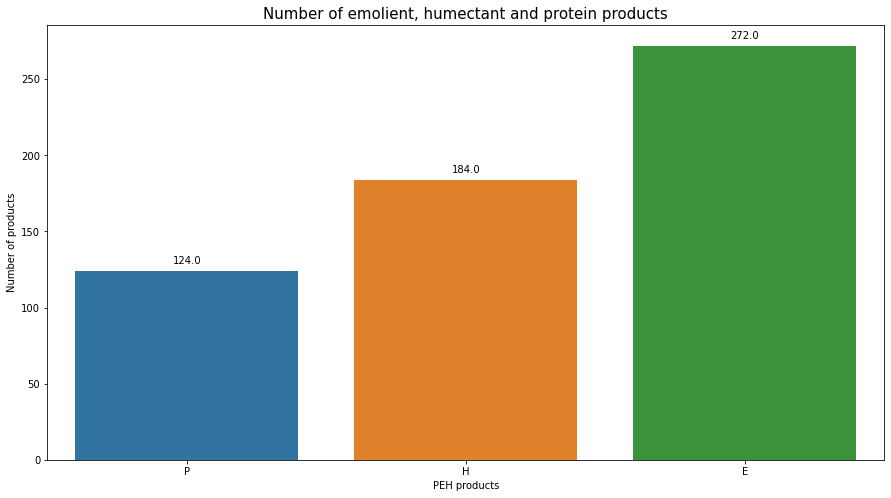

In [41]:
make_bar_plot(peh_filter, peh_filter.values, peh_filter, 'Number of emolient, humectant and protein products','PEH products','Number of products',peh_filter_sorted.index)

In [42]:
cg_filter = df_peh_work['CG'].value_counts()
cg_filter_sorted = cg_filter.sort_index(ascending=False)
cg_filter_sorted

6      2
4      1
3     11
2     29
1     53
0    484
Name: CG, dtype: int64

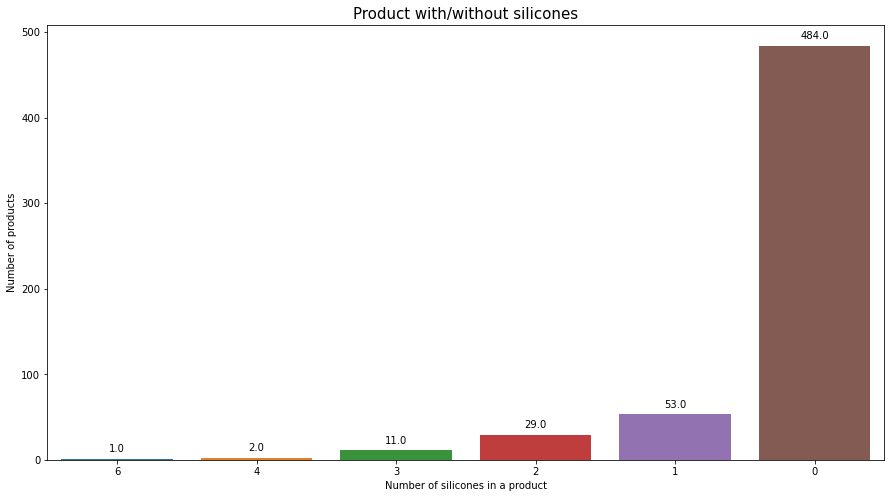

In [43]:
make_bar_plot(cg_filter, cg_filter.values, cg_filter, 'Product with/without silicones','Number of silicones in a product','Number of products',cg_filter_sorted.index)

In [44]:
cg_filter_sorted.index

Int64Index([6, 4, 3, 2, 1, 0], dtype='int64')

In [45]:
cg_filter_sorted.values

array([  2,   1,  11,  29,  53, 484], dtype=int64)

In [46]:
def percentage_values(series):
    percentage_values = []
    for value in series.values:
        percentage_values.append((value/series.values.sum())*100)
    return percentage_values

In [47]:
cg_prod_percentage = percentage_values(cg_filter_sorted)

In [48]:
print(cg_prod_percentage)

[0.3448275862068966, 0.1724137931034483, 1.896551724137931, 5.0, 9.137931034482758, 83.44827586206897]


In [49]:
#CG or not CG with labeled class +plot


In [50]:
def get_harmful_by_peh(data, peh_type):
    peh_filt = (data['peh_class'] == peh_type)
    harm_by_peh = data.loc[peh_filt, 'Harm_preservatives'].value_counts()
    harm_by_peh = harm_by_peh.sort_index(ascending=True)
#     df_harm_by_peh = pd.DataFrame(harm_by_peh)
#     df_harm_by_peh_final = df_harm_by_peh.rename(columns={"Harm_preservatives": peh_type}).sort_index()
    return(harm_by_peh)

In [51]:
harm_p_list = get_harmful_by_peh(df_peh_work, 'P')
harm_e_list = get_harmful_by_peh(df_peh_work, 'E')
harm_h_list = get_harmful_by_peh(df_peh_work, 'H')

In [52]:
harm_h_list

0    122
1     47
2     15
Name: Harm_preservatives, dtype: int64

In [53]:
peh_filter

E    272
H    184
P    124
Name: peh_class, dtype: int64

In [54]:
peh_list = peh_filter.values
peh_list_names = peh_filter.index
#populate harmful preservatives list
harm_by_peh_all = []
harm_by_peh_names = []

for peh_type in peh_list_names:
    harm_list = get_harmful_by_peh(df_peh_work, peh_type)
    harm_by_peh_all = harm_by_peh_all + harm_list.values.tolist()
    harm_by_peh_names = harm_by_peh_names + harm_list.index.tolist()

In [55]:
harm_by_peh_all

[190, 65, 15, 1, 1, 122, 47, 15, 67, 55, 2]

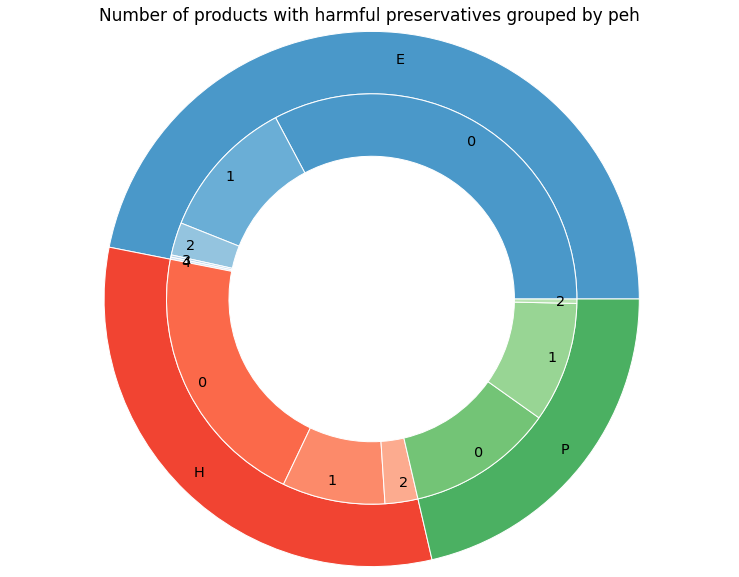

In [56]:
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
textprops={'size': 'x-large'}
# First Ring (outside)
fig, ax = plt.subplots(figsize=(13,10))
mypie, _ = ax.pie(peh_list, radius=3, labels=peh_list_names, colors=[a(0.6), b(0.6), c(0.6)], labeldistance=0.9, textprops=textprops)
plt.setp( mypie, width=0.7, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(harm_by_peh_all, radius=3-0.7, labels=harm_by_peh_names, labeldistance=0.9, colors=[a(0.6), a(0.5), a(0.4), a(0.3), a(0.2), b(0.5), b(0.4), b(0.3), c(0.5), c(0.4), c(0.3)], textprops=textprops)
plt.setp( mypie2, width=0.7, edgecolor='white')
plt.margins(0,0)
ax.set_title("Number of products with harmful preservatives grouped by peh", fontsize=17)
ax.axis('equal')

# first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
# second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)

# show it
plt.show()

In [57]:
viridis = cm.get_cmap('viridis', 5)
df_harm_by_peh.plot(kind="bar", figsize=(15,8), color=viridis.colors, width=0.5,align='center', zorder=3)
plt.title("Number of products with harmful preservatives grouped by peh",fontsize=15)
plt.xlabel("PEH products")
plt.ylabel("Number of harmful preservatives")
plt.grid(linestyle='-', linewidth='0.1', color='blue')



NameError: name 'df_harm_by_peh' is not defined

In [ ]:
stacked_data = df_harm_by_peh.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(15,8))
plt.title("Percentage of harmful preservatives in each peh class")
plt.xlabel("PEH products")
plt.ylabel("Percentage of harmful preservatives (%)")

In [ ]:
#Mean number of ingredients for each product +plot
#Products with protein , with natural oils/butters: + rodzaje + wykresy

In [ ]:
# peh_harm_grouped = df_peh_work.groupby(['peh_class']).sum()
# peh_harm_grouped

# Prepare dataset for training

In [58]:
df_peh_work.columns

Index(['inci', 'title', 'peh_class', 'inci_as_array', 'Harm_preservatives',
       'CG', 'oleum rusci', 'fruit acids complex citrus limon  peel extract',
       'lavandula angustifolia  extract', 'benzophone-3',
       ...
       'organic mango fruit extract',
       'prunus amygdalus dulcis seed extract / sweet almond seed extract',
       'allium cepa extract', 'triticum vulgate germ oil',
       'alpha isomethyl ionone', 'glycolipids', 'carbomer',
       'triticum vulgare germ oil', 'steareth-2', 'argania spinosa  oil'],
      dtype='object', length=1633)

In [59]:
df_final = df_peh_work.drop(df_peh_work.columns[[0, 1, 3, 4, 5]], axis=1)
df_final.head()

peh_class  oleum rusci  fruit acids complex citrus limon  peel extract  \
0         E            0                                               0   
1         E            0                                               0   
2         E            0                                               0   
3         E            0                                               0   
4         E            0                                               0   

   lavandula angustifolia  extract  benzophone-3  ci 47005  \
0                                0             0         0   
1                                0             0         0   
2                                1             0         0   
3                                0             0         0   
4                                0             0         0   

   caprylyl/capryl glucoside  hexyl cinnamaldehyde  humulus lupulus extract  \
0                          0                     0                        0   
1                          0                     0                        0   
2                          0                     0                        0   
3                          0                     0                        0   
4                          0                     0                        0   

   cedrus atlantica  wood extract  caprylic/capric triglycerides  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   rosmarinus officinalis  flower/leaf/stem extract  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   argania spinosa kernel oil  mangifera indica seed oil  seed oil  \
0                           0                                    0   
1                           0                                    0   
2                           0                                    0   
3                           0                                    0   
4                           0                                    0   

   organic bambusa vulgaris leaf extract  linum usitatissimum  seed  extract  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   eclipta alba  di panthenol  cassia hydroxypropyltrimonium chloride  \
0             0             0                                       0   
1             0             0                                       0   
2             0             0                                       0   
3             0             0                                       0   
4             0             0                                       0   

   indigofera tinctoria  althaea officinalis  root extract  \
0                     0                                  0   
1                     0                                  0   
2                     0                                  0   
3                     0                                  0   
4                     0                                  0   

   mauritia flexuosa fruit oil  sodium acetate  prunus persica  fruit extract  \
0                            0               0                              0   
1                            0               0                              0   


In [60]:
df_shuffled=df_final.sample(frac=1).reset_index(drop=True)
df_shuffled.head()

peh_class  oleum rusci  fruit acids complex citrus limon  peel extract  \
0         E            0                                               0   
1         H            0                                               0   
2         H            0                                               0   
3         H            0                                               0   
4         E            0                                               0   

   lavandula angustifolia  extract  benzophone-3  ci 47005  \
0                                0             0         0   
1                                0             0         0   
2                                0             0         0   
3                                0             0         0   
4                                0             0         0   

   caprylyl/capryl glucoside  hexyl cinnamaldehyde  humulus lupulus extract  \
0                          0                     0                        0   
1                          0                     0                        0   
2                          0                     0                        0   
3                          0                     0                        0   
4                          0                     0                        0   

   cedrus atlantica  wood extract  caprylic/capric triglycerides  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   rosmarinus officinalis  flower/leaf/stem extract  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   argania spinosa kernel oil  mangifera indica seed oil  seed oil  \
0                           0                                    0   
1                           1                                    0   
2                           0                                    0   
3                           0                                    0   
4                           0                                    0   

   organic bambusa vulgaris leaf extract  linum usitatissimum  seed  extract  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   eclipta alba  di panthenol  cassia hydroxypropyltrimonium chloride  \
0             0             0                                       0   
1             0             0                                       0   
2             0             0                                       0   
3             0             0                                       0   
4             0             0                                       0   

   indigofera tinctoria  althaea officinalis  root extract  \
0                     0                                  0   
1                     0                                  0   
2                     0                                  0   
3                     0                                  0   
4                     0                                  0   

   mauritia flexuosa fruit oil  sodium acetate  prunus persica  fruit extract  \
0                            0               1                              0   
1                            0               0                              0   


In [61]:
df_shuffled.loc[70:75]

peh_class  oleum rusci  fruit acids complex citrus limon  peel extract  \
70         P            0                                               0   
71         E            0                                               0   
72         H            0                                               0   
73         E            0                                               0   
74         H            0                                               0   
75         E            0                                               0   

    lavandula angustifolia  extract  benzophone-3  ci 47005  \
70                                0             0         0   
71                                0             0         0   
72                                0             0         0   
73                                0             0         0   
74                                0             0         0   
75                                0             0         0   

    caprylyl/capryl glucoside  hexyl cinnamaldehyde  humulus lupulus extract  \
70                          0                     0                        0   
71                          0                     0                        0   
72                          0                     0                        0   
73                          0                     0                        0   
74                          0                     0                        0   
75                          0                     0                        0   

    cedrus atlantica  wood extract  caprylic/capric triglycerides  \
70                               0                              0   
71                               0                              0   
72                               0                              0   
73                               0                              0   
74                               0                              0   
75                               0                              0   

    rosmarinus officinalis  flower/leaf/stem extract  \
70                                                 0   
71                                                 0   
72                                                 0   
73                                                 0   
74                                                 0   
75                                                 0   

    argania spinosa kernel oil  mangifera indica seed oil  seed oil  \
70                           0                                    0   
71                           0                                    0   
72                           0                                    0   
73                           0                                    0   
74                           0                                    0   
75                           0                                    0   

    organic bambusa vulgaris leaf extract  linum usitatissimum  seed  extract  \
70                                      0                                   0   
71                                      0                                   0   
72                                      0                                   0   
73                                      0                                   0   
74                                      0                                   0   
75                                      0                                   0   

    eclipta alba  di panthenol  cassia hydroxypropyltrimonium chloride  \
70             0             0                                       0   
71             0             0                                       0   
72             0             0                                       0   
73             0             0                                       0   
74             0             0                                       0   
75             0             0                                       0   

In [90]:
path_to_output = r'C:\Users\Pszczółka\Projects\Data_Science_Projects\Clustering_PEH_dataset'
df_shuffled.to_csv(path_to_output + r'\PEH_dataset_clustering.csv')

In [62]:
X = df_shuffled.iloc[:,1:]
y = df_shuffled.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
X_train.shape

(388, 1627)

In [64]:
X_test.shape

(192, 1627)

# Compare different ML models for multiclassification

In [65]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


In [66]:
X_test.head()

oleum rusci  fruit acids complex citrus limon  peel extract  \
575            0                                               0   
277            0                                               0   
104            0                                               0   
177            0                                               0   
456            0                                               0   

     lavandula angustifolia  extract  benzophone-3  ci 47005  \
575                                0             0         0   
277                                0             0         0   
104                                0             0         0   
177                                0             0         0   
456                                0             0         0   

     caprylyl/capryl glucoside  hexyl cinnamaldehyde  humulus lupulus extract  \
575                          0                     0                        0   
277                          0                     0                        0   
104                          0                     0                        0   
177                          0                     0                        0   
456                          0                     0                        0   

     cedrus atlantica  wood extract  caprylic/capric triglycerides  \
575                               0                              0   
277                               0                              0   
104                               0                              0   
177                               0                              0   
456                               0                              0   

     rosmarinus officinalis  flower/leaf/stem extract  \
575                                                 0   
277                                                 0   
104                                                 0   
177                                                 0   
456                                                 0   

     argania spinosa kernel oil  mangifera indica seed oil  seed oil  \
575                           0                                    0   
277                           0                                    0   
104                           0                                    0   
177                           0                                    0   
456                           1                                    0   

     organic bambusa vulgaris leaf extract  \
575                                      0   
277                                      0   
104                                      0   
177                                      0   
456                                      0   

     linum usitatissimum  seed  extract  eclipta alba  di panthenol  \
575                                   0             0             0   
277                                   0             0             0   
104                                   0             0             0   
177                                   0             0             0   
456                                   0             0             0   

     cassia hydroxypropyltrimonium chloride  indigofera tinctoria  \
575                                       0                     0   
277                                       0                     0   
104                                       0                     0   
177                                       0                     0   
456                                       0                     0   

     althaea officinalis  root extract  mauritia flexuosa fruit oil  \
575                                  0                            0   
277                                  0                            0   
104                                  0                            0   
177                                  0                            0   
456                                  0               

In [67]:
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.5833333333333334


In [79]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, svm_predictions), "\nDecision function shape: ", svm_model_linear.decision_function_shape)

Accuracy: 0.6875 
Decision function shape:  ovr


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           E       0.71      0.79      0.75        92
           H       0.69      0.58      0.63        59
           P       0.62      0.61      0.62        41

    accuracy                           0.69       192
   macro avg       0.68      0.66      0.67       192
weighted avg       0.69      0.69      0.68       192



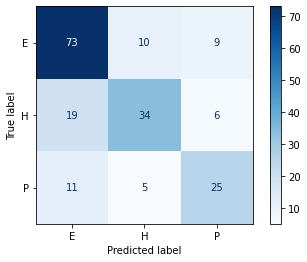

In [81]:
plot_confusion_matrix(svm_model_linear,
                                    X_test, y_test,
                                    cmap=plt.cm.Blues)

# Hyperparameter tuning for SVC

In [89]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

SVC(C=1000, gamma=0.001)


In [88]:
svc_tunned_predict = grid.predict(X_test)
print(classification_report(y_test,svc_tunned_predict))

              precision    recall  f1-score   support

           E       0.70      0.78      0.74        92
           H       0.67      0.56      0.61        59
           P       0.62      0.61      0.62        41

    accuracy                           0.68       192
   macro avg       0.67      0.65      0.66       192
weighted avg       0.68      0.68      0.67       192



In [72]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 

print("Accuracy from metrics:",metrics.accuracy_score(y_test, gnb_predictions))

Accuracy from metrics: 0.5677083333333334


In [73]:
from sklearn.ensemble import RandomForestClassifier
random_for = RandomForestClassifier()
random_for.fit(X_train, y_train)
rf_predictions = random_for.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, rf_predictions))

Accuracy:  0.6875


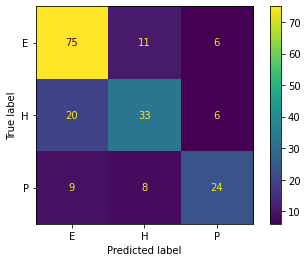

In [82]:
plot_confusion_matrix(random_for,
                            X_test, y_test,
                            cmap=plt.cm.viridis)

In [75]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier(max_iter=300)
snn_classifier.fit(X_train, y_train)
snn_predictions = snn_classifier.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, snn_predictions))

Accuracy:  0.6875


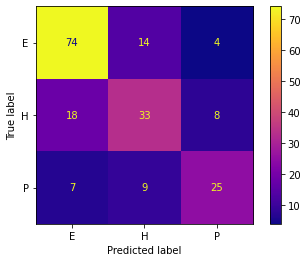

In [83]:
plot_confusion_matrix(snn_classifier,
                                X_test, y_test,
                                cmap=plt.cm.plasma)

In [ ]:
#Try xgboost and grid search for random forest ! 